In [1]:
# Example of performing storm tracking on CESM2 data
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os
from stormlab.tracking import rainstorm_tracking
from stormlab.tracking import attach_prcp

In [35]:
# Get the current working directory (where your Jupyter Notebook is located)
notebook_dir = os.getcwd()
# Construct the relative path to the data directory
cesm_folder = os.path.join(notebook_dir, "../data/cesm2/bias_corrected_annual_cesm2/1251_18/2022")

In [38]:
# load 6-hour CESM2 integrated water vapour flux (IVT) data with dimension (time, lat, lon)
ivt_xarray = xr.open_dataset(cesm_folder + "/" + "CESM2_2022_ivt_bs.nc")
ivt_array = ivt_xarray['ivt'].data
lat_data = ivt_xarray['latitude'].data
lon_data = ivt_xarray['longitude'].data
time_steps = ivt_xarray['time'].data

## IVT event tracking

```
Function: rainstorm_tracking(ivt_array, low_threshold=250, high_threshold=500, morph_radius=1, expand_distance=5,
                       overlap_ratio=0.2, dry_spell_time=0)
```
Parameters:
- **ivt_array** (numpy.ndarray): Array of integrated water vapor flux fields with dimensions (time, lat, lon) and units of kg/m/s.
- **low_threshold** (float, optional): Lower threshold value to identify IVT objects. Default is 250 kg/m/s.
- **high_threshold** (float, optional): Higher threshold value to identify IVT objects. Default is 500 kg/m/s. An IVT object is identified as an area with IVT values greater than this threshold. The object is then expanded to the boundary defined by the lower threshold.
- **morph_radius** (int, optional): Search radius (in pixels) to connect spatially close IVT objects at the same time step. Default is 1 pixel for 1-degree resolution and 4 pixels for 0.25-degree resolution.
- **expand_distance** (int, optional): Distance (in pixels) to control the expansion of IVT objects to the lower threshold boundary. Default is 5 pixels.
- **overlap_ratio** (float, optional): Overlap ratio threshold for tracking IVT objects between consecutive time steps. If the overlap ratio of two objects at t0 and t1 is greater than this value, they are considered to be the same event. Default is 0.2.
- **dry_spell_time** (int, optional): Maximum number of time steps allowed for a dry period (no IVT objects) to exist while still allowing tracking of IVT objects across the dry period. Default is 0.

Returns:
- **tracked_array** (numpy.ndarray): Array with the same dimension as the input ivt_array. An unique integer is assigned to pixels within the region of an IVT event over time steps.

In [40]:
# set up idnetification and tracking parameters
morph_radius = 1  
high_threshold = 500
low_threshold = 250
expand_distance = 5

track_array = rainstorm_tracking(ivt_array, low_threshold=low_threshold, high_threshold=high_threshold, morph_radius=morph_radius, expand_distance=expand_distance,
                       overlap_ratio=0.2, dry_spell_time=0)

## Attach precipitation to each IVT event
```
Function: attach_precipitation(prcp_array, track_array)
```
Parameters:
- **prcp_array** (numpy.ndarray): Array of precipitation fields with dimensions (time, lat, lon) and units of mm.
- **track_array** (numpy.ndarray): Array of tracked IVT objects obtained from function rainstorm_tracking(). The track_array and prcp_array should have the same dimension. 

Returns:
- **prcp_label_array** (numpy.ndarray): Array with the same dimension as the input prcp_array. Pixels within precipitation areas are assigned a unique integer value corresponding to the associated IVT event.

In [47]:
prcp_xarray = xr.open_dataset(
        cesm_folder + "/" + "CESM2_2022_prect_bs.nc")
prcp_array = prcp_xarray['prect'].data  # default unit: mm

# attach associated precipitation event to each ar event
prcp_label_array = attach_prcp(track_array, prcp_array)

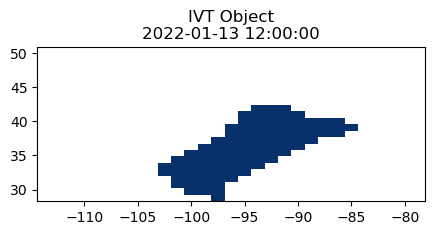

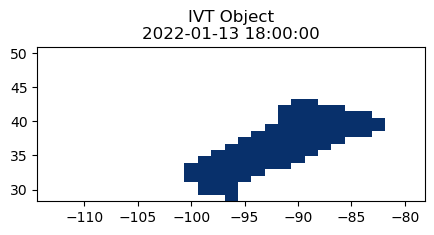

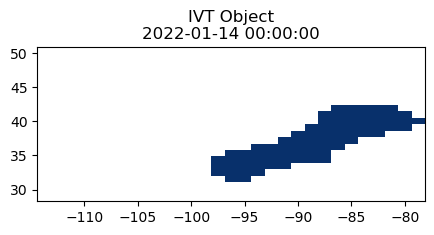

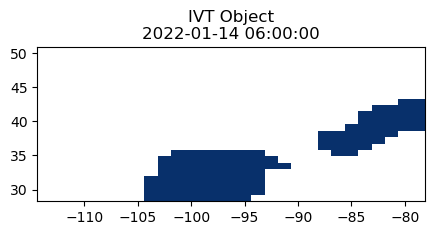

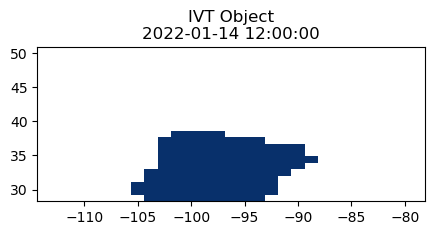

In [50]:
for time_index in np.arange(50, 55):
    plt.figure(figsize = (5, 2))
    plt.title(f'IVT Object\n{time_steps[time_index]}')
    plt.pcolormesh(lon_data, lat_data, np.ma.masked_where(track_array[time_index] <= 0, track_array[time_index]), cmap = 'Blues_r')

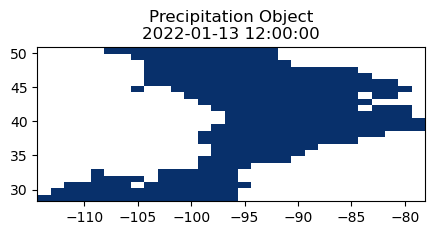

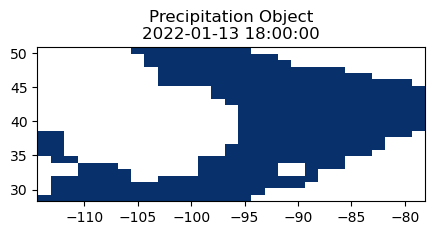

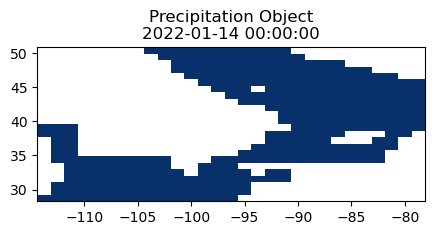

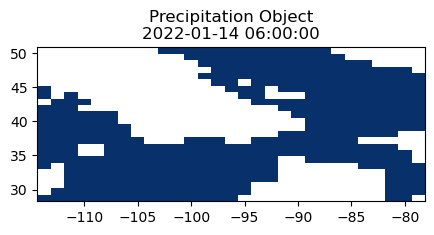

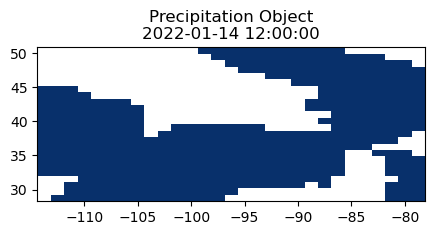

In [51]:
for time_index in np.arange(50, 55):
    plt.figure(figsize = (5, 2))
    plt.title(f'Precipitation Object\n{time_steps[time_index]}')
    plt.pcolormesh(lon_data, lat_data, np.ma.masked_where(prcp_label_array[time_index] <= 0, prcp_label_array[time_index]), cmap = 'Blues_r')